In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
dfx = pd.read_csv("dfx.csv")

Deleting one row MBC

In [3]:
dfx_noMBC = dfx[dfx['Oncotree Code']!='MBC']

In [4]:
dfx.head()

,Unnamed: 0,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,...,DA110839,FAM71A,Cancer Type Detailed,ER Status,HER2 Status,Neoplasm Histologic Grade,Oncotree Code,PR Status,Tumor Size,Tumor Stage
0,MB-0362,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,...,5.251843,5.049591,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,18.0,2.0
1,MB-0346,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,...,5.450611,5.316790,Breast Invasive Ductal Carcinoma,Negative,Positive,3.0,IDC,Negative,16.0,2.0
2,MB-0386,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,...,5.235394,5.461617,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,15.0,3.0
3,MB-0574,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,...,5.091927,5.227130,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,21.0,2.0
4,MB-0503,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,...,5.315224,5.027476,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,23.0,2.0


In [5]:
dfx_only_onc = dfx_noMBC.drop(['Unnamed: 0','Cancer Type Detailed','ER Status','HER2 Status','Neoplasm Histologic Grade','Tumor Stage','PR Status','Tumor Size'],axis=1)

In [6]:
dfx_only_onc.head()
#Where OncoTreeCode is NA
# dfx_only_onc = dfx_only_onc[np.isfinite(dfx_only_onc['Oncotree Code'])]
# dfx_only_onc['Oncotree Code'].isnull().values.any()
dfx_only_onc = dfx_only_onc[pd.notnull(dfx_only_onc['Oncotree Code'])]
dfx_only_onc['Oncotree Code'].isnull().values.any()

False

In [7]:
dfx_only_onc.head()

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A,Oncotree Code
0,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,...,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591,IDC
1,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,...,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790,IDC
2,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,...,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617,IDC
3,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,...,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,5.227130,IDC
4,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,6.684893,...,5.472185,7.701394,8.137014,5.498185,6.214301,5.274600,6.839417,5.315224,5.027476,IDC


In [8]:
X = dfx_only_onc.loc[:, dfx_only_onc.columns != 'Oncotree Code']
Y = dfx_only_onc['Oncotree Code']
X

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
0,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,...,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591
1,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,...,5.942887,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790
2,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,...,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617
3,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,...,5.116749,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,5.227130
4,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,6.684893,...,5.402314,5.472185,7.701394,8.137014,5.498185,6.214301,5.274600,6.839417,5.315224,5.027476
5,9.286585,6.206729,5.372668,5.167365,5.783374,8.744149,8.518929,5.228937,5.629885,5.632753,...,5.489447,5.543384,7.690236,8.009209,5.408243,6.175542,5.299248,6.326814,5.543680,5.086662
6,8.437347,6.095592,5.693519,5.189106,5.737572,5.480091,7.478413,5.430230,5.686286,5.866132,...,5.357598,5.325600,7.837494,8.818098,5.291289,6.003532,5.555575,8.375567,5.444825,4.991999
7,8.569973,6.383530,5.401276,5.416517,5.923928,5.671577,8.410583,5.200576,5.770271,7.403098,...,5.415931,5.346443,7.360295,7.969567,5.104648,6.501156,5.241082,6.534520,5.420087,5.493967
8,8.892102,5.773691,5.567946,5.339133,5.902223,5.509498,7.779545,5.383724,5.510622,6.881749,...,5.733573,5.504519,7.679597,8.721196,5.218413,6.617991,5.220612,7.143399,5.307056,5.062520
9,8.922748,6.461321,5.410957,5.389980,5.536764,7.196945,8.385897,5.397070,5.594352,6.484873,...,5.412129,5.597104,8.096537,8.073800,5.220937,6.262962,5.234383,7.149541,5.174048,5.583954


In [9]:
Y

0          IDC
1          IDC
2          IDC
3          IDC
4          IDC
5          IDC
6          IDC
7          IDC
8          IDC
9          IDC
10         IDC
11         IDC
12         IDC
13         ILC
14         IDC
15         IDC
16         IDC
17         IDC
18         IDC
19        MDLC
20         IDC
21         IDC
22         IDC
23        MDLC
24        MDLC
25         IDC
26         IDC
27         IDC
28         IDC
29         IDC
         ...  
1873       IDC
1874    BREAST
1875       ILC
1876       IDC
1877       IDC
1878       IDC
1879       IDC
1880       IDC
1881      MDLC
1882    BREAST
1883       IDC
1884    BREAST
1885       IDC
1886       IDC
1887       ILC
1888       IDC
1889       IDC
1890       IDC
1891       IDC
1892      MDLC
1893       IDC
1894       IDC
1895       IDC
1896       IDC
1897       IDC
1898       IDC
1899       IDC
1900       IDC
1901      MDLC
1902      MDLC
Name: Oncotree Code, Length: 1887, dtype: object

Finding number of unique values

In [10]:
np.unique(Y, return_counts=True)

(array(['BREAST', 'IDC', 'ILC', 'IMMC', 'MDLC'], dtype=object),
 array([  17, 1499,  142,   22,  207], dtype=int64))

Imputing missing values

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_impu = imp.fit_transform(X)
X_impu = pd.DataFrame(X_impu, columns=X.columns)


In [12]:
X_impu

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
0,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,...,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591
1,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,...,5.942887,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790
2,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,...,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617
3,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,...,5.116749,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,5.227130
4,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,6.684893,...,5.402314,5.472185,7.701394,8.137014,5.498185,6.214301,5.274600,6.839417,5.315224,5.027476
5,9.286585,6.206729,5.372668,5.167365,5.783374,8.744149,8.518929,5.228937,5.629885,5.632753,...,5.489447,5.543384,7.690236,8.009209,5.408243,6.175542,5.299248,6.326814,5.543680,5.086662
6,8.437347,6.095592,5.693519,5.189106,5.737572,5.480091,7.478413,5.430230,5.686286,5.866132,...,5.357598,5.325600,7.837494,8.818098,5.291289,6.003532,5.555575,8.375567,5.444825,4.991999
7,8.569973,6.383530,5.401276,5.416517,5.923928,5.671577,8.410583,5.200576,5.770271,7.403098,...,5.415931,5.346443,7.360295,7.969567,5.104648,6.501156,5.241082,6.534520,5.420087,5.493967
8,8.892102,5.773691,5.567946,5.339133,5.902223,5.509498,7.779545,5.383724,5.510622,6.881749,...,5.733573,5.504519,7.679597,8.721196,5.218413,6.617991,5.220612,7.143399,5.307056,5.062520
9,8.922748,6.461321,5.410957,5.389980,5.536764,7.196945,8.385897,5.397070,5.594352,6.484873,...,5.412129,5.597104,8.096537,8.073800,5.220937,6.262962,5.234383,7.149541,5.174048,5.583954


Feature Selection

# Using 2000 features

In [35]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(chi2, k=2000)
selector.fit(X_impu, Y)
cols = selector.get_support(indices=True)
X_new = X_impu.iloc[:,cols]


In [ ]:
data2k = X_new
data2k['label'] = Y
corr = data2k.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
print("the shape of new data is: ",X_new.shape)

the shape of new data is:  (1887, 2000)


Resampling

Resampled dataset shape after running SMOTE algorithm for Data Oversampling Counter({'IMMC': 1499, 'BREAST': 1499, 'MDLC': 1499, 'IDC': 1499, 'ILC': 1499})


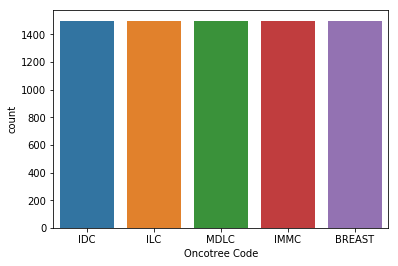

In [108]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42,k_neighbors=3, sampling_strategy='auto')
X_s, y_s = sm.fit_resample(X_new, Y)
print('Resampled dataset shape after running SMOTE algorithm for Data Oversampling %s' % Counter(y_s))
# X_s['y'] = y_s
dfffff = pd.DataFrame(X_s)
dfffff = pd.concat([dfffff,y_s],axis=1)
sns.countplot(dfffff['Oncotree Code'])

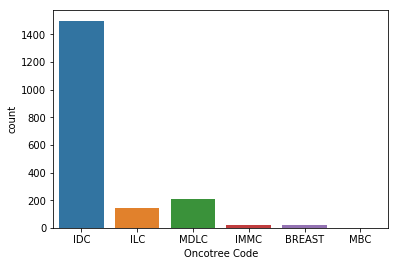

In [107]:
sns.countplot(dfx['Oncotree Code'])

Training Testing Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2)
print ("the shape of training data is ",X_train.shape, y_train.shape)
print ("the shape of testing data is ",X_test.shape, y_test.shape)

the shape of training data is  (5996, 2000) (5996,)
the shape of testing data is  (1499, 2000) (1499,)


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

In [56]:
clf = SVC(kernel="linear", C=0.025)
#79 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)

print(score)


[[[1185    0]
  [  50  264]]

 [[1195   13]
  [   0  291]]

 [[1172   37]
  [   0  290]]

 [[1197    0]
  [   0  302]]

 [[1197    0]
  [   0  302]]]
0.9666444296197465


In [76]:
clf = SVC(kernel='rbf', gamma=0.001)
 #81.21 before, 0.715 0.05 gamma, 99.006 0.001 gamma
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)
print(score)

[[[1211    4]
  [   0  284]]

 [[1185    0]
  [   1  313]]

 [[1211    0]
  [   3  285]]

 [[1173    0]
  [   0  326]]

 [[1212    0]
  [   0  287]]]
0.9973315543695798


In [22]:
clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)
print(score)

[[[1114   63]
  [  74  248]]

 [[1186   35]
  [  14  264]]

 [[1110   53]
  [  71  265]]

 [[1207    2]
  [   0  290]]

 [[1220    6]
  [   0  273]]]
0.8939292861907938


c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)
print(score)

[[[1202    9]
  [  27  261]]

 [[1161    8]
  [   1  329]]

 [[1194   20]
  [   9  276]]

 [[1188    0]
  [   0  311]]

 [[1214    0]
  [   0  285]]]
0.9753168779186124


In [23]:
clf = GaussianNB()
#0.568 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)
print(score)

[[[1042  135]
  [ 137  185]]

 [[1082  139]
  [ 128  150]]

 [[ 952  211]
  [ 124  212]]

 [[1208    1]
  [ 109  181]]

 [[1181   45]
  [  33  240]]]
0.6457638425617078


### Ensemble 

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [21]:
lr = LogisticRegression(max_iter = 20)
svm_linear = SVC(kernel='linear',C=0.025)
rf = RandomForestClassifier()
svm = SVC(kernel = 'rbf', gamma=0.001)
evc = VotingClassifier( estimators= [('svm_linear',svm_linear),('lr',lr),('svm',svm),('rf',rf)], voting = 'hard')
evc.fit(X_train,y_train)
evc.score(X_test, y_test)

c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9793195463642428

In [22]:
y_pred = evc.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))


[[[1199   12]
  [  19  269]]

 [[1163    6]
  [   1  329]]

 [[1201   13]
  [  11  274]]

 [[1188    0]
  [   0  311]]

 [[1214    0]
  [   0  285]]]


# Using 5000 features

In [16]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(chi2, k=5000)
selector.fit(X_impu, Y)
cols = selector.get_support(indices=True)
X_new = X_impu.iloc[:,cols]

In [17]:
print("the shape of new data is: ",X_new.shape)

the shape of new data is:  (1887, 5000)


Resampling

In [33]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42,k_neighbors=3, sampling_strategy='auto')
X_s, y_s = sm.fit_resample(X_new, Y)
print('Resampled dataset shape after running SMOTE algorithm for Data Oversampling %s' % Counter(y_s))

Resampled dataset shape after running SMOTE algorithm for Data Oversampling Counter({'IDC': 1499, 'MDLC': 1499, 'ILC': 1499, 'IMMC': 1499, 'BREAST': 1499})


Training Testing Split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2)
print ("the shape of training data is ",X_train.shape, y_train.shape)
print ("the shape of testing data is ",X_test.shape, y_test.shape)

the shape of training data is  (5996, 5000) (5996,)
the shape of testing data is  (1499, 5000) (1499,)


In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [36]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)
print(score)

[[[1180    8]
  [  23  288]]

 [[1201   11]
  [   1  286]]

 [[1175   12]
  [   7  305]]

 [[1208    0]
  [   0  291]]

 [[1201    0]
  [   0  298]]]
0.9793195463642428


In [38]:
feature_importances = zip(cols, clf.feature_importances_)
feature_importances = sorted(feature_importances, key = lambda x:x[1],reverse = True)
for x, y in feature_importances[:10]:
    print (dfx.columns[x],y)

BM991113 0.00998937665148284
CR742828 0.00480918180397954
FLT3 0.004693304538201123
BU944995 0.00408050000998805
AW290922 0.004006282813819588
C3orf77 0.003404282467591048
CNTROB 0.0033433957970417376
RPS13 0.003253670486005827
GPR153 0.003223176824687931
ERMP1 0.003043186122226935


In [73]:
clf = SVC(kernel="linear", C=0.025)
#79 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)
print(score)

[[[1215    0]
  [  29  255]]

 [[1177    8]
  [   0  314]]

 [[1191   20]
  [   0  288]]

 [[1173    0]
  [   0  326]]

 [[1211    1]
  [   0  287]]]
0.980653769179453


In [80]:
clf = SVC(kernel='rbf', gamma=0.001)
 #81.21 before, 0.715 0.05 gamma, 99.006 0.001 gamma
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)
print(score)

[[[1211    4]
  [   0  284]]

 [[1185    0]
  [   1  313]]

 [[1211    0]
  [   3  285]]

 [[1173    0]
  [   0  326]]

 [[1212    0]
  [   0  287]]]
0.9973315543695798


In [75]:
clf = LogisticRegression()

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
print(score)

[[[1168   47]
  [  85  199]]

 [[1154   31]
  [  22  292]]

 [[1146   65]
  [  47  241]]

 [[1171    2]
  [   0  326]]

 [[1203    9]
  [   0  287]]]
0.8972648432288192


c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
clf = GaussianNB()
#0.568 before
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))
score = clf.score(X_test, y_test)

print(score)

[[[1069  110]
  [ 108  212]]

 [[1114  108]
  [ 118  159]]

 [[1018  182]
  [ 109  190]]

 [[1207    0]
  [  46  246]]

 [[1167   21]
  [  40  271]]]
0.7191460973982655


### Ensemble 

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [67]:
lr = LogisticRegression(max_iter = 20)
rf = RandomForestClassifier()

svm_linear = SVC(kernel='linear',C=0.025)
svm = SVC(kernel = 'rbf', gamma=0.001)
evc = VotingClassifier( estimators= [('svm_linear',svm_linear),('lr',lr),('svm',svm),('rf',rf)], voting = 'hard')
evc.fit(X_train,y_train)
evc.score(X_test, y_test)

c:\users\nimis\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9819879919946631

In [68]:
y_pred = evc.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred, labels=['IDC','ILC','MDLC','BREAST','IMMC']))


[[[1220    5]
  [  22  252]]

 [[1184    4]
  [   0  311]]

 [[1172   15]
  [   5  307]]

 [[1182    3]
  [   0  314]]

 [[1211    0]
  [   0  288]]]


# Dimensionality Reduction and Plot

In [20]:
from sklearn.decomposition import KernelPCA,PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_impu)
X_reduced.shape

(1887, 3)

In [21]:
y_num = Y.apply(['IDC','ILC','MDLC','BREAST','IMMC'].index)

In [22]:
x_nen=pd.DataFrame(data=X_reduced[0:,0:],index=[i for i in range(X_reduced.shape[0])],columns=['f'+str(i) for i in range(X_reduced.shape[1])])

In [23]:
x_nen['y'] = y_num

In [24]:
idcs = x_nen[x_nen.y == 0].iloc[:500,:]
ilcs = x_nen[x_nen.y == 1]
mdlcs = x_nen[x_nen.y == 2]
brs = x_nen[x_nen.y == 3]
immcs = x_nen[x_nen.y == 4]
# mdlcs.shape

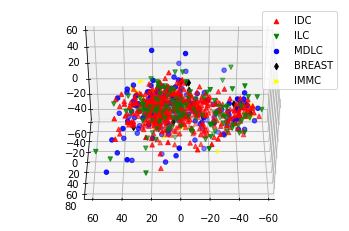

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(idcs.iloc[:,0],idcs.iloc[:,1],idcs.iloc[:,2],c='r',marker='^',label='IDC')
ax.scatter(ilcs.iloc[:,0],ilcs.iloc[:,1],ilcs.iloc[:,2],c='green',marker='v',label='ILC')
ax.scatter(mdlcs.iloc[:,0],mdlcs.iloc[:,1],mdlcs.iloc[:,2],c='blue',marker='o',label='MDLC')
ax.scatter(brs.iloc[:,0],brs.iloc[:,1],brs.iloc[:,2],c='black',marker='d',label='BREAST')
ax.scatter(immcs.iloc[:,0],immcs.iloc[:,1],immcs.iloc[:,2],c='yellow',marker='>',label='IMMC')


ax.view_init(40, 90)
ax.legend()
plt.savefig('OncoPCA.png')

# Using resampled data

In [109]:
from sklearn.decomposition import KernelPCA,PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_s)
X_reduced.shape

(7495, 3)

In [110]:
y_num = y_s.apply(['IDC','ILC','MDLC','BREAST','IMMC'].index)

In [111]:
x_nen=pd.DataFrame(data=X_reduced[0:,0:],index=[i for i in range(X_reduced.shape[0])],columns=['f'+str(i) for i in range(X_reduced.shape[1])])

In [112]:
y_num

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      2
20      0
21      0
22      0
23      2
24      2
25      0
26      0
27      0
28      0
29      0
       ..
7465    2
7466    2
7467    2
7468    2
7469    2
7470    2
7471    2
7472    2
7473    2
7474    2
7475    2
7476    2
7477    2
7478    2
7479    2
7480    2
7481    2
7482    2
7483    2
7484    2
7485    2
7486    2
7487    2
7488    2
7489    2
7490    2
7491    2
7492    2
7493    2
7494    2
Name: Oncotree Code, Length: 7495, dtype: int64

In [113]:
x_nen['y'] = y_num

In [120]:
idcs = x_nen[x_nen.y == 0]
ilcs = x_nen[x_nen.y == 1]
mdlcs = x_nen[x_nen.y == 2]
brs = x_nen[x_nen.y == 3]
immcs = x_nen[x_nen.y == 4]
ilcs.shape

(1499, 4)

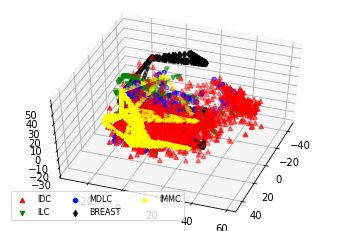

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(idcs.iloc[:,0],idcs.iloc[:,1],idcs.iloc[:,2],c='r',marker='^',label='IDC')
ax.scatter(ilcs.iloc[:,0],ilcs.iloc[:,1],ilcs.iloc[:,2],c='green',marker='v',label='ILC')
ax.scatter(mdlcs.iloc[:,0],mdlcs.iloc[:,1],mdlcs.iloc[:,2],c='blue',marker='o',label='MDLC')
ax.scatter(brs.iloc[:,0],brs.iloc[:,1],brs.iloc[:,2],c='black',marker='d',label='BREAST')
ax.scatter(immcs.iloc[:,0],immcs.iloc[:,1],immcs.iloc[:,2],c='yellow',marker='>',label='IMMC')


ax.view_init(50, 20)

ax.legend(scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.savefig('OncoSMOTE.png')